<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/day_wise.csv")
print(df)

           Date  Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
0    2020-01-22        555      17         28      510          0           0   
1    2020-01-23        654      18         30      606         99           1   
2    2020-01-24        941      26         36      879        287           8   
3    2020-01-25       1434      42         39     1353        493          16   
4    2020-01-26       2118      56         52     2010        684          14   
..          ...        ...     ...        ...      ...        ...         ...   
183  2020-07-23   15510481  633506    8710969  6166006     282756        9966   
184  2020-07-24   15791645  639650    8939705  6212290     281164        6144   
185  2020-07-25   16047190  644517    9158743  6243930     255545        4867   
186  2020-07-26   16251796  648621    9293464  6309711     204606        4104   
187  2020-07-27   16480485  654036    9468087  6358362     228693        5415   

     New recovered  Deaths 

In [2]:
print(df.ndim)
print(df.shape)

2
(188, 12)


In [3]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [4]:
X = df.drop(columns=['Date', 'Deaths'])
y = df['Deaths']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
constant_feature=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_feature)

0

In [6]:
quasi_constant_features = []

for feature in x_train.columns:
    predominant = (x_train[feature].value_counts(normalize=True).values[0])
    if predominant >= 0.99:
        quasi_constant_features.append(feature)

print(f"Number of quasi-constant features: {len(quasi_constant_features)}")
for feat in quasi_constant_features:
    print(feat)


Number of quasi-constant features: 0


In [8]:
duplicated_feat = []

for i in range(0, len(x_train.columns)):
    col_1 = x_train.columns[i]
    for col_2 in x_train.columns[i + 1:]:
        if x_train[col_1].equals(x_train[col_2]):
            duplicated_feat.append(col_2)

print(f"Number of duplicated features: {len(duplicated_feat)}")

Number of duplicated features: 0


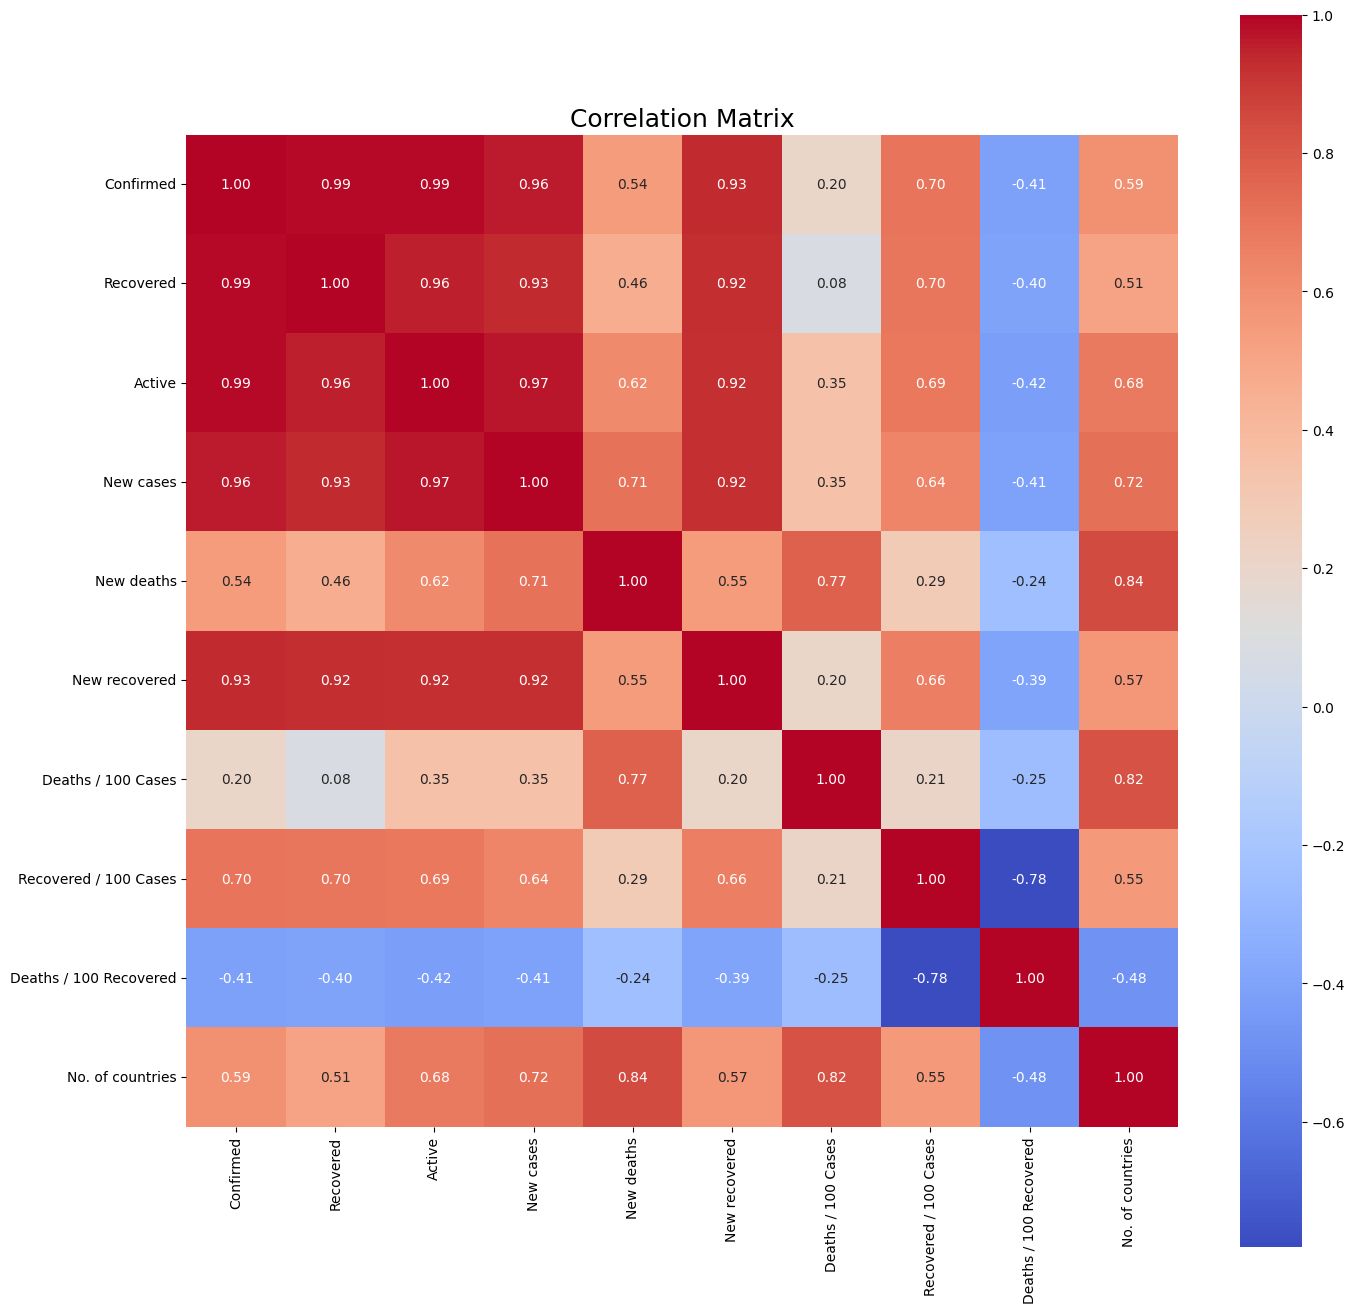

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = x_train.corr()

fig, ax = plt.subplots()
fig.set_size_inches(16, 16)

sns.heatmap(corrmat, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar=True)

plt.title("Correlation Matrix", fontsize=18)
plt.show()


In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [11]:
corr_features = correlation(x_train, 0.9)
correlated_features = set(corr_features)

print(len(correlated_features))

4


In [14]:

cols_to_drop = [col for col in correlated_features if col in x_train.columns]

x_train.drop(labels=cols_to_drop, axis=1, inplace=True)
x_test.drop(labels=cols_to_drop, axis=1, inplace=True)


In [20]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (131, 6)
X_test shape: (57, 6)


In [18]:
print(x_train.shape)


(131, 6)


In [26]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (131, 6)
y_train shape: (131,)


Mutual Information Scores (regression):
 Confirmed                 3.252102
Deaths / 100 Cases        2.090077
Recovered / 100 Cases     2.004205
Deaths / 100 Recovered    1.601334
No. of countries          0.968459
New deaths                0.788430
dtype: float64


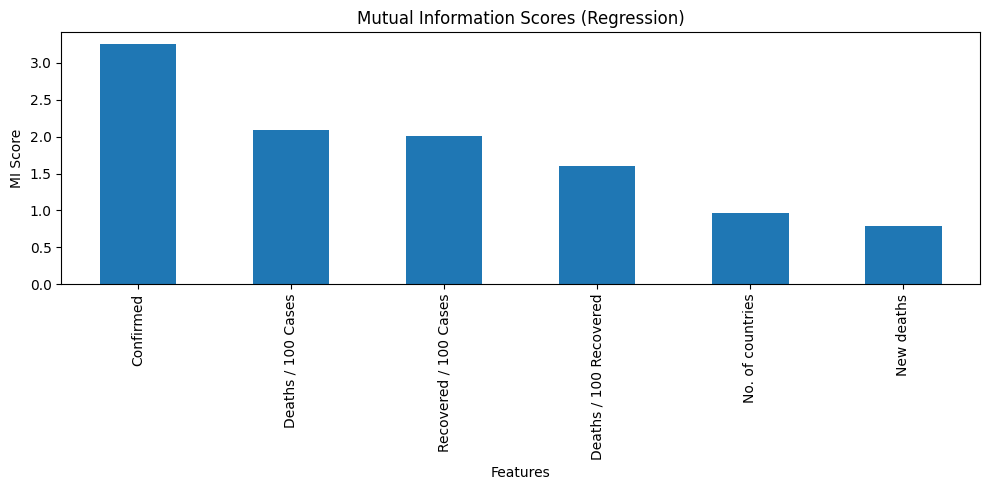

In [28]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(x_filled, y_train)

mi_series = pd.Series(mi_scores, index=x_train.columns)
mi_sorted = mi_series.sort_values(ascending=False)

print("Mutual Information Scores (regression):\n", mi_sorted)

# Optional plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
mi_sorted.plot(kind='bar')
plt.title('Mutual Information Scores (Regression)')
plt.ylabel('MI Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()
